# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     898.8
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           8.01e-41
Time:                        09:05:41   Log-Likelihood:                0.40943
No. Observations:                  50   AIC:                             7.181
Df Residuals:                      46   BIC:                             14.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9759      0.085     58.346      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.50227972  4.99943838  5.45363957  5.83425915  6.12172509  6.31073304
  6.41111791  6.44623794  6.44913704  6.45711578  6.50560299  6.62233493
  6.82279827  7.10768568  7.46278207  7.86130001  8.26828091  8.64633855
  8.96180159  9.19024563  9.32050608  9.35651249  9.31664291  9.23070446
  9.13503607  9.06653812  9.05660979  9.1259903   9.28135148  9.51420162
  9.80228064 10.11321734 10.40984793 10.65632188 10.82399214 10.89612168
 10.87063341 10.7604514  10.5913775  10.39785218 10.21729605 10.08396174
 10.02330633 10.0478088  10.15491977 10.32748036 10.53654133 10.74611939
 10.91910912 11.02337932]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.02652165 10.88304956 10.61499941 10.27258931  9.92192396  9.62880989
  9.44264378  9.38431836  9.44110722  9.56978062]


## Plot comparison

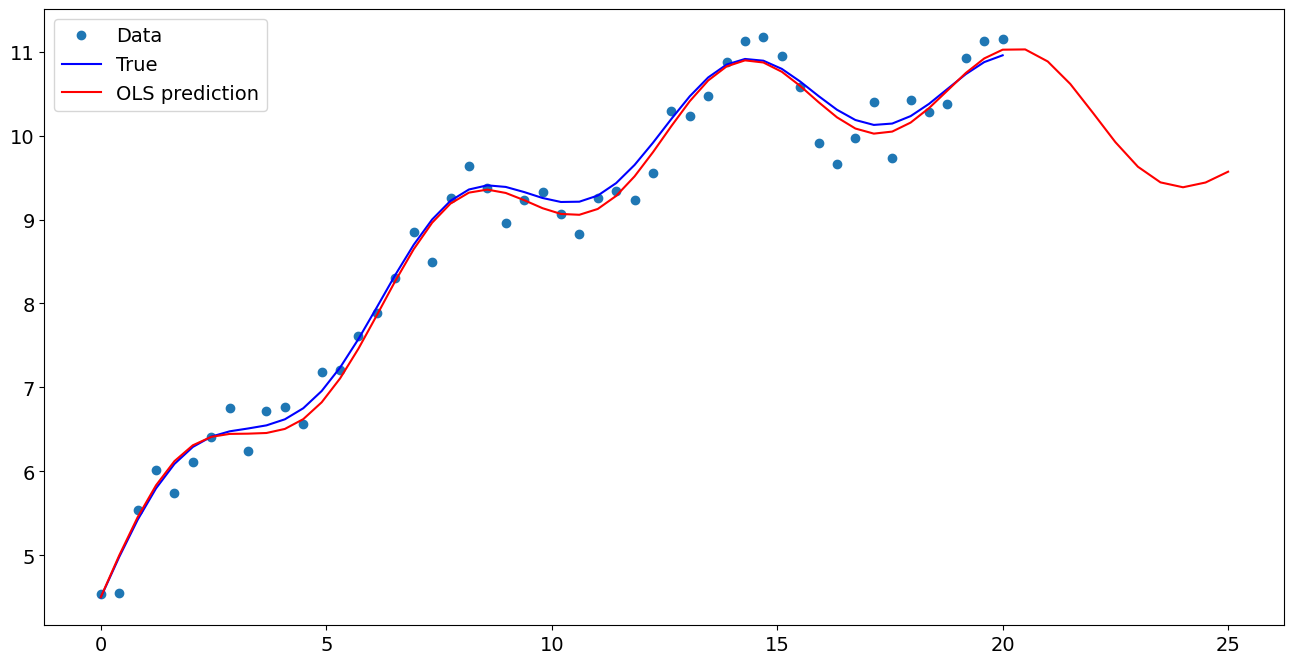

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.975930
x1                  0.489865
np.sin(x1)          0.561920
I((x1 - 5) ** 2)   -0.018946
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.026522
1    10.883050
2    10.614999
3    10.272589
4     9.921924
5     9.628810
6     9.442644
7     9.384318
8     9.441107
9     9.569781
dtype: float64